In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [18]:
pd.set_option('display.max_columns', 60)
myData=pd.read_csv('imputedData.csv')
myData.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [19]:
#One hot encoding of categorical variables

#Create list with features to be dummified cols.
nonum_feats_names = ['Month','OperatingSystems','Browser','Region','VisitorType','Weekend']


dataModel = pd.concat([myData[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
                              'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues',
                               'TrafficType','SpecialDay']],
                       pd.get_dummies(myData[nonum_feats_names].astype('category')),myData['Revenue']],axis=1)
                      
dataModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 57 columns):
Administrative                   12330 non-null int64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null int64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null int64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
TrafficType                      12330 non-null int64
SpecialDay                       12330 non-null float64
Month_Aug                        12330 non-null uint8
Month_Dec                        12330 non-null uint8
Month_Feb                        12330 non-null uint8
Month_Jul                        12330 non-null uint8
Month_June                       12330 non-null uint8
Month_Mar    

In [20]:
#Label Encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
myData['Revenue'] = le.fit_transform(myData['Revenue'])
myData['Revenue'].value_counts()

myData['Revenue'].head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

In [21]:
# getting dependent and independent variables

x = dataModel
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = myData['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 56)
Shape of y: (12330,)


In [22]:
# splitting the data

from sklearn.model_selection import train_test_split

x_baseTrain, x_baseTest, y_baseTrain, y_baseTest = train_test_split(x[['Month_Aug','Month_Dec','Month_Feb','Month_Jul','Month_June','Month_Mar','Month_May','Month_Nov','Month_Oct','Month_Sep',
 'OperatingSystems_1','OperatingSystems_2','OperatingSystems_3','OperatingSystems_4','OperatingSystems_5','OperatingSystems_6',
'OperatingSystems_7','OperatingSystems_8','Browser_1','Browser_2','Browser_3','Browser_4','Browser_5','Browser_6','Browser_7',
'Browser_8','Browser_9','Browser_10','Browser_11','Browser_12','Browser_13','Region_1','Region_2','Region_3','Region_4',
'Region_5','Region_6','Region_7','Region_8','Region_9','VisitorType_New_Visitor','VisitorType_Other',
 'VisitorType_Returning_Visitor','Weekend_False','Weekend_True']], y, test_size = 0.3, random_state = 42)

# checking the shapes

print("Shape of x_train :", x_baseTrain.shape)
print("Shape of y_train :", y_baseTrain.shape)
print("Shape of x_test :", x_baseTest.shape)
print("Shape of y_test :", y_baseTest.shape)

Shape of x_train : (8631, 45)
Shape of y_train : (8631,)
Shape of x_test : (3699, 45)
Shape of y_test : (3699,)


In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [24]:
# calculate the chi2 p_value between each of the cat variables
# and the target
# it returns 2 arrays, one contains the F-Scores which are then 
# evaluated against the chi2 distribution to obtain the pvalue
# the pvalues are in the second array, see below

f_score = chi2(x_baseTrain, y_baseTrain)
f_score

(array([1.43537495e+00, 7.19558412e+00, 1.94347244e+01, 2.49960273e-05,
        5.30015752e+00, 3.91861740e+01, 3.75997879e+01, 1.53865584e+02,
        1.00314605e+01, 6.93840988e+00, 8.86097697e-04, 1.28581572e+01,
        3.99474948e+01, 1.09482635e+00, 2.79685938e-01, 5.59371876e-01,
        5.47958345e-01, 5.75644048e-02, 3.19114059e-01, 6.00243728e-03,
        5.07476309e+00, 1.24631735e+00, 1.15114072e+00, 1.99085795e+00,
        8.19336788e-03, 1.35416779e-01, 1.82652782e-01, 4.39923848e-01,
        2.79685938e-01, 3.16606796e-01, 9.90953061e-01, 1.33818130e+00,
        8.67671307e-01, 1.26520991e+00, 1.70828854e-01, 2.30257619e-01,
        6.18844314e-04, 1.47349416e-02, 2.86105784e+00, 1.80752490e-03,
        8.07580853e+01, 4.20779773e-02, 1.30420113e+01, 1.13187305e+00,
        3.80455763e+00]),
 array([2.30889242e-01, 7.30831978e-03, 1.04097080e-05, 9.96010911e-01,
        2.13234959e-02, 3.85258742e-10, 8.68539251e-10, 2.47801670e-35,
        1.53888972e-03, 8.43640778e-03

In [27]:
# let's add the variable names and order it for clearer visualisation

pvalues = pd.Series(f_score[1])
pvalues.index = x_baseTrain.columns
pvalues.sort_values(ascending=False)

Month_Jul                        9.960109e-01
Region_6                         9.801534e-01
OperatingSystems_1               9.762526e-01
Region_9                         9.660882e-01
Browser_2                        9.382454e-01
Browser_7                        9.278762e-01
Region_7                         9.033841e-01
VisitorType_Other                8.374712e-01
OperatingSystems_8               8.103878e-01
Browser_8                        7.128806e-01
Region_4                         6.793762e-01
Browser_9                        6.691033e-01
Region_5                         6.313329e-01
OperatingSystems_5               5.969071e-01
Browser_11                       5.969071e-01
Browser_12                       5.736540e-01
Browser_1                        5.721405e-01
Browser_10                       5.071592e-01
OperatingSystems_7               4.591531e-01
OperatingSystems_6               4.545134e-01
Region_2                         3.516008e-01
Browser_13                       3

For Fisher score, the smaller the p_value, the more significant the feature is to predict the target

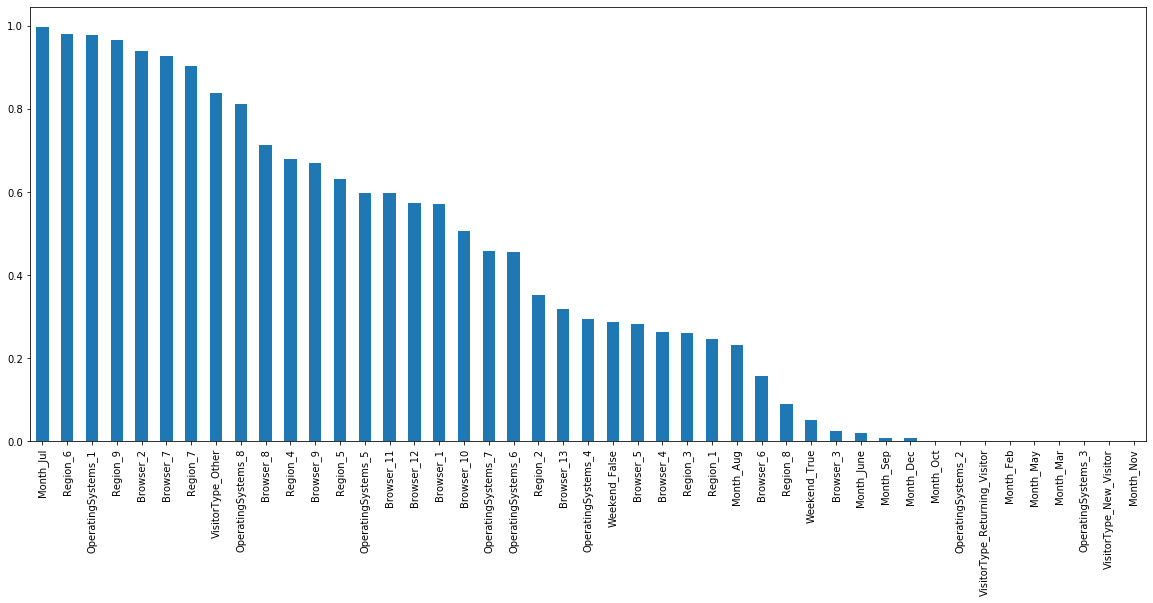

In [28]:
pvalues.sort_values(ascending=False).plot.bar(figsize=(20, 8))

# Most important categorical variables.

Browser_6                        
Region_8                         
Weekend_True                     
Browser_3                        
Month_June                       
Month_Sep                        
Month_Dec                        
Month_Oct                        
OperatingSystems_2               
VisitorType_Returning_Visitor #delete as per corr  
Month_Feb                        
Month_May                        
Month_Mar                        
OperatingSystems_3               
VisitorType_New_Visitor          
Month_Nov       
